In [0]:
## Importing the tensorflow version
import tensorflow as tf
print(tf.__version__)
tf.set_random_seed(42)

1.15.0


In [0]:
## Mounting the drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


**Importing the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import os
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from sklearn import metrics
from keras.utils.np_utils import to_categorical
from subprocess import check_output

Using TensorFlow backend.


In [0]:
## Specifying the path of the project
project_path='/content/gdrive/My Drive/AIML/Plant Seedling/'

In [0]:
## Specifying the path for train and test dataset
train_path= project_path + 'train.zip'
test_path= project_path + 'test.zip'

Using ZipFile library to extract train and test zip files

In [0]:
from zipfile import ZipFile

with ZipFile(train_path,'r') as zip:
  zip.extractall() 

In [0]:
from zipfile import ZipFile
with ZipFile(test_path,'r') as f:
 f.extractall() 

In [0]:
## Specifying the required variable names as an empty set 
training_data=[]
test_data=[]
X=[]
y=[]
X_test=[]

In [0]:
## Changing the directory to the required path
os.chdir(project_path+ 'train')

In [0]:
## Listing the directories inside the path
os.listdir()

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [0]:
## Resizing and appending the training images into training dataset
for i in os.listdir():
  for j in os.listdir(i):
    temp=cv2.imread(project_path+'train/' + i +'/'+j)
    temp=cv2.resize(temp,(128,128))
    training_data.append([temp,i])


In [0]:
## Changing the directory to the test path
os.chdir(project_path+ 'test')

In [0]:
## Resizing and appending the test images into test dataset
for i in os.listdir():
    temp1=cv2.imread(project_path+'test/' + i)
    temp1=cv2.resize(temp1,(128,128))
    test_data.append(temp1)


In [0]:
## Displaying the length of the training and test data
print("Length of train data:",len(training_data))
print("Length of test data:",len(test_data))

Length of train data: 4750
Length of test data: 794


In [0]:
## Random shuffling of the training data
import random
random.shuffle(training_data)

In [0]:
print(training_data[0:2])

[[array([[[ 47,  63,  84],
        [ 49,  65,  87],
        [ 55,  71,  90],
        ...,
        [ 42,  59,  76],
        [ 50,  64,  80],
        [ 45,  60,  76]],

       [[ 44,  62,  83],
        [ 44,  64,  85],
        [ 42,  62,  83],
        ...,
        [ 46,  62,  79],
        [ 52,  65,  80],
        [ 58,  71,  86]],

       [[ 52,  70,  90],
        [ 46,  65,  86],
        [ 43,  63,  84],
        ...,
        [ 45,  59,  77],
        [ 45,  58,  76],
        [ 45,  58,  75]],

       ...,

       [[ 29,  50,  76],
        [ 27,  48,  71],
        [ 32,  45,  65],
        ...,
        [ 76,  91, 113],
        [ 81,  96, 116],
        [ 83, 100, 118]],

       [[ 38,  55,  77],
        [ 30,  49,  72],
        [ 27,  42,  64],
        ...,
        [ 68,  85, 108],
        [ 82,  97, 117],
        [ 81,  98, 115]],

       [[ 41,  58,  79],
        [ 36,  53,  76],
        [ 22,  39,  62],
        ...,
        [ 75,  91, 112],
        [ 82,  98, 117],
        [ 85,  99, 119

In [0]:
## Appending the features and labels into X and y variables
for features, label in training_data:
  X.append(features)
  y.append(label)

In [0]:
y[0:2]

['Fat Hen', 'Black-grass']

In [0]:
X=np.array(X)
X_test=np.array(test_data)

In [0]:
print("Shape of Test Features:",X_test.shape)
print("Shape of Train Features:",X.shape)

Shape of Test Features: (794, 128, 128, 3)
Shape of Train Features: (4750, 128, 128, 3)


In [0]:
for label in set(y):

  print("number of {} images is  -> {}".format(
        label, 
        len(X[y == label])))

number of Fat Hen images is  -> 0
number of Loose Silky-bent images is  -> 0
number of Charlock images is  -> 0
number of Common Chickweed images is  -> 0
number of Black-grass images is  -> 0
number of Scentless Mayweed images is  -> 0
number of Shepherds Purse images is  -> 0
number of Small-flowered Cranesbill images is  -> 0
number of Cleavers images is  -> 0
number of Maize images is  -> 0
number of Common wheat images is  -> 0
number of Sugar beet images is  -> 0


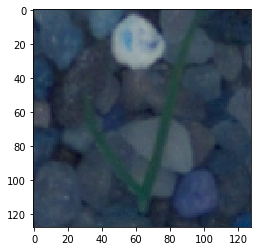

In [0]:
## Displaying randomly a image from X
plt.imshow(X[20])

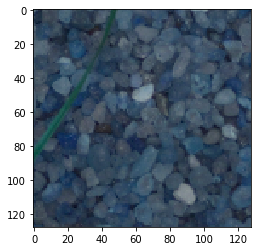

In [0]:
plt.imshow(X_test[20])

In [0]:
## Normalizing the features to have variation in data between 0 to 1
X=X/255
X_test=X_test/255

In [0]:
X[0:1]

array([[[[0.18431373, 0.24705882, 0.32941176],
         [0.19215686, 0.25490196, 0.34117647],
         [0.21568627, 0.27843137, 0.35294118],
         ...,
         [0.16470588, 0.23137255, 0.29803922],
         [0.19607843, 0.25098039, 0.31372549],
         [0.17647059, 0.23529412, 0.29803922]],

        [[0.17254902, 0.24313725, 0.3254902 ],
         [0.17254902, 0.25098039, 0.33333333],
         [0.16470588, 0.24313725, 0.3254902 ],
         ...,
         [0.18039216, 0.24313725, 0.30980392],
         [0.20392157, 0.25490196, 0.31372549],
         [0.22745098, 0.27843137, 0.3372549 ]],

        [[0.20392157, 0.2745098 , 0.35294118],
         [0.18039216, 0.25490196, 0.3372549 ],
         [0.16862745, 0.24705882, 0.32941176],
         ...,
         [0.17647059, 0.23137255, 0.30196078],
         [0.17647059, 0.22745098, 0.29803922],
         [0.17647059, 0.22745098, 0.29411765]],

        ...,

        [[0.11372549, 0.19607843, 0.29803922],
         [0.10588235, 0.18823529, 0.27843137]

In [0]:
## Label Encoding the target Variable
y=np.array(y)
y

array(['Fat Hen', 'Black-grass', 'Charlock', ..., 'Fat Hen',
       'Small-flowered Cranesbill', 'Scentless Mayweed'], dtype='<U25')

In [0]:
## Preprocessing the target variable
header = np.unique(y)
labels = preprocessing.LabelEncoder()
labels.fit(header)
encodedlabels = labels.transform(y)
print('\n')
print('Classes'+str(labels.classes_))



Classes['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']


In [0]:
""" One Hot Encoding """
y = to_categorical(encodedlabels)

In [0]:
y.shape

(4750, 12)

In [0]:
## Splitting the data into train and validation set
xtrain, xval, ytrain, yval = train_test_split(X,y, test_size=0.3,random_state=10)

In [0]:
print("Shape of Test Features:",xval.shape)
print("Shape of Test Labels:",yval.shape)
print("Shape of Train Features:",xtrain.shape)
print("Shape of Train Labels:",ytrain.shape)

Shape of Test Features: (1425, 128, 128, 3)
Shape of Test Labels: (1425, 12)
Shape of Train Features: (3325, 128, 128, 3)
Shape of Train Labels: (3325, 12)


# **Building a CNN Classifier model**


In [0]:
## Create a model
model1= Sequential()
## Adding convolution layers with 32 filters of 3*3 size and mentioning input shape with relu activation
model1.add(Conv2D(32, kernel_size=(3, 3), input_shape=(128, 128, 3), activation='relu'))
model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
## Add pooling layer with filter size 2*2
model1.add(MaxPooling2D(pool_size=(2,2)))
## Adding a dropout rate of 0.15 
model1.add(Dropout(0.15))
## Flattening the output of convolution layer
model1.add(Flatten())
## Adding a dense layer with 128 neurons and relu activation
model1.add(Dense(128, activation='relu'))
## Adding the output layer
model1.add(Dense(12, activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
## Compiling the model
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 123008)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               15745152  
_________________________________________________________________
dense_2 (Dense)              (None, 12)               

In [0]:
# Fit the model
early_stopping = EarlyStopping(monitor='val_acc', patience=5, mode='auto')
callback_list = [early_stopping]

model1.fit(xtrain, ytrain, validation_data=(xval, yval), epochs=10, batch_size=256 , callbacks=callback_list)

# Final evaluation of the model
scores = model1.evaluate(xval, yval, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 3325 samples, validate on 1425 samples
Epoch 1/20
3325/3325 [==============================] - 160s 48ms/step - loss: 2.2174 - acc: 0.2334 - val_loss: 2.4045 - val_acc: 0.2189
Epoch 2/20
3325/3325 [==============================] - 158s 48ms/step - loss: 1.2964 - acc: 0.5949 - val_loss: 2.0843 - val_acc: 0.3579
Epoch 3/20
3325/3325 [==============================] - 158s 47ms/step - loss: 0.6635 - acc: 0.8289 - val_loss: 1.8402 - val_acc: 0.4828
Epoch 4/20
3325/3325 [==============================] - 156s 47ms/step - loss: 0.3288 - acc: 0.9236 - val_loss: 1.6162 - val_acc: 0.5375
Epoch 5/20
3325/3325 [==============================] - 157s 47ms/step - loss: 0.2070 - acc: 0.9660 - val_loss: 1.6709 - val_acc: 0.5551
Epoch 6/20
3325/3325 [==============================] - 156s 47ms/step - loss: 0.1615 - acc: 0.9696 - val_loss: 1.7374 - val_acc: 0.5467
Epoch 7/20
3325/3325 [==============================] - 157s 47ms/step - loss: 0.1249 - acc: 0.9817 - val_loss: 1.6778 - val_acc: 

In [0]:
# Final evaluation of the model
Validation_scores = model1.evaluate(xval, yval, verbose=0)
Train_scores = model1.evaluate(xtrain, ytrain, verbose=0)
print("Train Accuracy: %.2f%%" % (Train_scores[1]*100))
print("Validation Accuracy: %.2f%%" % (Validation_scores[1]*100))

Train Accuracy: 98.47%
Validation Accuracy: 60.91%


In [0]:
def readTestData(testDir):
    data = []
    filenames = []
    # loop over the input images
    images = os.listdir(project_path+'test/')
    for imageFileName in images:
        # load the image, pre-process it, and store it in the data list
        imageFullPath = os.path.join(project_path+'test/', imageFileName)
        #print(imageFullPath)
        img = load_img(imageFullPath)
        arr = img_to_array(img)  # Numpy array with shape (...,..,3)
        arr = cv2.resize(arr, (128,128)) 
        data.append(arr)
        filenames.append(imageFileName)
    return data, filenames

In [0]:
# read test data and find its classification
testX, filenames = readTestData("")


In [0]:
 y_test = model1.predict(X_test)


submit_filename = 'CNN_PlantSeed_Classification.csv'
Y_pred_classes = np.argmax(y_test,axis = 1)
Y_pred_df = labels.inverse_transform(Y_pred_classes)
results_data = pd.DataFrame(data={'file': filenames, 'species':Y_pred_df})
results_data.to_csv(submit_filename, index=False)

In [0]:
seedling = pd.read_csv('/content/drive/My Drive/AIML/Plant Seedling/test/CNN_PlantSeed_Classification.csv')

In [5]:
seedling

,file,species
0,851c90831.png,Loose Silky-bent
1,444473900.png,Common wheat
2,003d61042.png,Common wheat
3,03e322a29.png,Fat Hen
4,9cce7328c.png,Loose Silky-bent
...,...,...
789,d84d37a61.png,Common Chickweed
790,ff65bc002.png,Charlock
791,dc4cd56a3.png,Loose Silky-bent
792,b7ad92859.png,Small-flowered Cranesbill
